In [1]:
import pandas as pd
import numpy as np
import re
from scipy.ndimage import gaussian_filter1d
import matplotlib.pyplot as plt
import datetime

def read_data(local=False, offset=0):
    if not local:
        print("read database!!!")
        df = pd.read_sql(f'SELECT * FROM crypt where id >{offset}', con=engine)
        df.to_csv("data.csv")
    else:
        print("read local df")
        df = pd.read_csv("data.csv", index_col=0)
    start = df.iloc[0]["time"]
    end = df.iloc[-1]["time"]
    return df, start, end

def cut_data(df, n):
    try:
        start = re.sub(":\d\d:", ":00:", str(df.index[0]))
        bins = pd.date_range(start, df.index[-1], freq=f'{n}Min')
        dti = pd.DatetimeIndex([bins[-1] + datetime.timedelta(minutes=n)])
        bins = bins.append(dti)
        cats = pd.cut(pd.to_datetime(df.index), bins=bins, labels=bins[:-1], right=False)
        df["cats"] = cats
        df1 = df.groupby(["cats"]).apply(lambda i: i.iloc[-1] if len(i) > 0 else None)
        df1.fillna(method='bfill', inplace=True)
        df1.index = cats.categories
        df1.drop('cats', axis=1, inplace=True)
        return df1
    except Exception as e:
        df.to_csv("fuck.csv")
        print(df.head(5))
        print(df.tail(5))
        print(f"cut data {n}",start,df.index[-1])
        print(repr(e))

In [2]:
df = pd.read_csv("data.csv",index_col=0)

In [3]:
df3 = cut_data(df,3)

In [4]:
df3.head()

,ALICE,BTC,ADA,BNB,QTUM,SUSHI,SHIB,XTZ,ALGO,CHR,...,DOT,LINK,ZEN,NEAR,SOL,AUDIO,BTT,ALPHA,RAY,FTM
2021-09-11 16:00:00,12.52,45236.4,2.383,399.9,12.467,11.138,0.000006,7.836,2.1506,0.3321,...,28.63,26.57,79.97,8.933,177.63,2.217,0.003892,1.0992,15.399,1.4769
2021-09-11 16:03:00,12.52,45236.4,2.383,399.9,12.467,11.138,0.000006,7.836,2.1506,0.3321,...,28.63,26.57,79.97,8.933,177.63,2.217,0.003892,1.0992,15.399,1.4769
2021-09-11 16:06:00,12.52,45236.4,2.383,399.9,12.467,11.138,0.000006,7.836,2.1506,0.3321,...,28.63,26.57,79.97,8.933,177.63,2.217,0.003892,1.0992,15.399,1.4769
2021-09-11 16:09:00,12.52,45236.4,2.383,399.9,12.467,11.138,0.000006,7.836,2.1506,0.3321,...,28.63,26.57,79.97,8.933,177.63,2.217,0.003892,1.0992,15.399,1.4769
2021-09-11 16:12:00,12.52,45236.4,2.383,399.9,12.467,11.138,0.000006,7.836,2.1506,0.3321,...,28.63,26.57,79.97,8.933,177.63,2.217,0.003892,1.0992,15.399,1.4769


In [5]:
df3.columns

Index(['ALICE', 'BTC', 'ADA', 'BNB', 'QTUM', 'SUSHI', 'SHIB', 'XTZ', 'ALGO',
       'CHR', 'ATOM', 'AXS', 'TLM', 'DOGE', 'XRP', 'ETH', 'EOS', 'BCH', 'LTC',
       'MATIC', 'AAVE', 'DOT', 'LINK', 'ZEN', 'NEAR', 'SOL', 'AUDIO', 'BTT',
       'ALPHA', 'RAY', 'FTM'],
      dtype='object')

In [6]:
df3.shape

(1916, 31)

(120,) (120,)


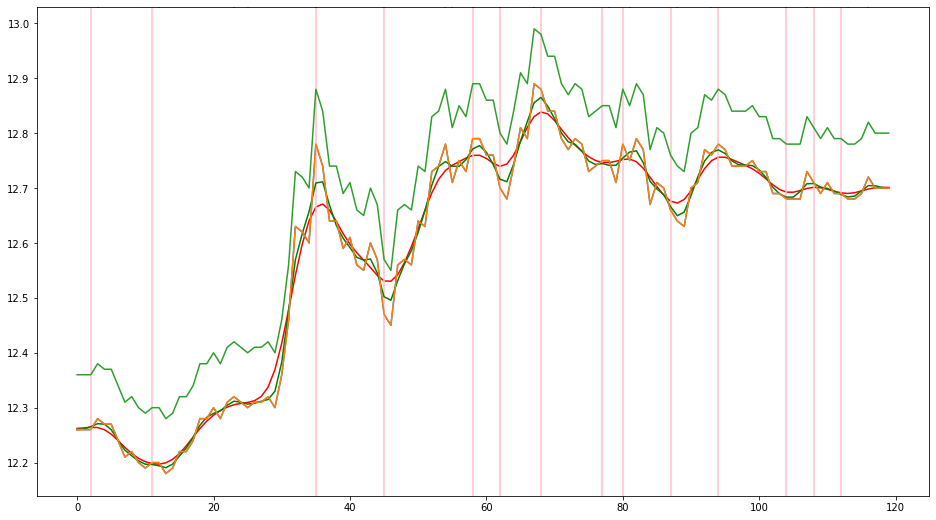

In [7]:
alice = df3["ALICE"][-120:]

alice2 = alice[:]

smooth = gaussian_filter1d(alice, 2)
# alice.plot()
plt.figure(figsize=(16,9))
plt.plot(smooth,c='r',label="smooth")

plt.plot(alice.values)

smooth_d1 = np.gradient(smooth)
infls1  = np.where(np.diff(np.sign(smooth_d1)))[0]




for i, infl in enumerate(infls1, 1):
    plt.axvline(x=infl, color='pink', label=f'Inflection Point {i}')
    
smooth2 = gaussian_filter1d(alice2, 1)
print(alice2.shape,smooth2.shape)
plt.plot(smooth2,c='g',label="smooth2")

plt.plot(alice2.values)


smooth_d2 = np.gradient(smooth2)
infls2  = np.where(np.diff(np.sign(smooth_d2)))[0]

for i, infl in enumerate(infls2, 1):
    plt.axvline(x=infl,ymin=11.3,color='purple', label=f'Inflection Point {i}')
    
# plt.legend()
plt.plot(alice2.values+0.1)
plt.show()

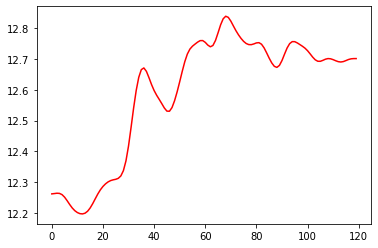

In [8]:
plt.plot(smooth,c='r',label="smooth")

In [12]:
np.where([-1,0,0,111,1,1,1,0,0,1])

(array([0, 3, 4, 5, 6, 9], dtype=int64),)

In [14]:
smooth_d1[infls1]

array([ 0.0002879 , -0.00221085,  0.01521578, -0.00533671,  0.00255638,
       -0.00063416,  0.00237782, -0.00189277,  0.00202101, -0.00726905,
        0.00318701, -0.00244474,  0.00063695, -0.00204383])

In [9]:

def alertor(df,n,crys):
    df3 = cut_data(df,n)
    data= df3.tail(120)
    smooth = gaussian_filter1d(data,sigma= 2,axis=0)
    df_sm = pd.DataFrame(sm,columns=data.columns)
    sm_grad = np.gradient(df_sm,axis=0)
    a,b  = np.where(np.diff(np.sign(sm_grad),axis=0))
    cry2index = {k:i for i,k in enumerate(df_sm.index)}
    for x in crys:
        if not cry2index.get(x):
            continue
        i = cry2index.get(x)
        infls = a[np.argwhere(b==i)]
        plt.plot(df_sm[x])
        for i, infl in enumerate(infls, 1):
            plt.axvline(x=infl,color='pink',)
        print(f"{x}_.jpg")
        plt.save(f"{x}_.jpg")
       

        

In [10]:
alertor(df,3,["ALICE"])

NameError: name 'sm' is not defined

In [ ]:
import os

In [ ]:
os.getcwd()

In [ ]:
data= df3.tail(120)
data.shape

In [ ]:
sm = gaussian_filter1d(data,sigma= 2,axis=0)

In [ ]:
sm.shape

In [ ]:
dfsm = pd.DataFrame(sm,columns=data.columns)

In [ ]:
alice2 = dfsm["ALICE"]

In [ ]:
smd = np.gradient(dfsm,axis=0)

In [ ]:
smd.shape

In [ ]:
a = np.diff(np.sign(smd),axis=0)

In [ ]:
np.where([0,0,2,-1,25,3])

In [ ]:
j = np.zeros(9).reshape([-1,3])
j[1][1] = 1
j[2][2] = 1
j[2][1] = 1 

In [ ]:
np.where(j)

In [ ]:
smd

In [ ]:

print(smd.shape)
sminf  = np.where(np.diff(np.sign(smd),axis=0))


In [ ]:
a,b=sminf

In [ ]:
b

In [ ]:
index0 = np.argwhere(b==0)

In [ ]:
b.shape

In [ ]:
a.shape

In [ ]:
INFS = a[index0]
INFS

In [ ]:
dfsm

In [ ]:
plt.plot(dfsm["ALICE"])
for i, infl in enumerate(INFS, 1):
    plt.axvline(x=infl,color='purple', label=f'Inflection Point {i}')

In [ ]:
fig = plt.figure(figsize=(16,9))
plt.plot(data["ALICE"][-50:].values)
plt.plot(xx[-50:],dfsm["ALICE"][-50:],marker="o")
# fig.autofmt_xdate()
plt.xticks(rotation=90)
plt.savefig("fuck.jpg",bbox_inches='tight')

In [ ]:
dfsm

In [ ]:
df3

In [ ]:
alice120 = df3["ALICE"][-120:]
smootha = gaussian_filter1d(alice120,sigma=2)
xx = pd.to_datetime(alice120.index).strftime('%d:%H:%M')
xx

In [ ]:
sm_grad = np.gradient(smootha)
sm_grad

In [ ]:
infsa =np.where(np.diff(np.sign(sm_grad),axis=0))
infsa = infsa[0]
infsa

In [ ]:
xx[infsa]

In [ ]:
fig = plt.figure(figsize=(16,9))
# plt.plot(data["ALICE"][-50:].values)
plt.plot(alice120.values,marker="o")
plt.plot(smootha,marker="o")
for i, infl in enumerate(infsa, 1):
    plt.axvline(x=infl,color='purple', label=f'Inflection Point {infl}')
    plt.text(x=infl,y=smootha.min(),s=xx[infl],rotation=30)
# fig.autofmt_xdate()
print(i)
plt.xticks(rotation=90)
plt.legend()
plt.savefig("fuck.jpg",bbox_inches='tight')

In [ ]:
xx

In [ ]:
np.gradient([0,0,0,0,1,0,0,0,1])

In [ ]:
np.where(np.diff(np.sign(np.array([0,np.nan,0,0,0,1,0,np.nan,np.nan,1])),axis=0))

In [ ]:
df3 = pd.read_csv("df3.csv",index_col=0)
df3.shape

In [ ]:
df3.fillna(method="ffill",inplace=True)
smooth = gaussian_filter1d(df3, sigma=2, axis=0)
df_sm = pd.DataFrame(smooth, columns=df3.columns)
sm_grad = np.gradient(df_sm, axis=0)
a, b = np.where(np.diff(np.sign(sm_grad), axis=0))
cry2index = {k: i for i, k in enumerate(df_sm.columns)}
forsend = []

print(cry2index)
for x in ["ALICE"]:
    if cry2index.get(x) is None:
        print(f"not {x}")
        continue
    os.makedirs(os.path.join("imgs", x),exist_ok=True)
    i = cry2index.get(x)
    infls = a[np.argwhere(b == i)]
    aitem = df3.index[infls[-1]]
    t = aitem[0]
#     .strftime("%d-%H-%M")[0]
    fname = f"{x}_{t}.jpg"
    fname = os.path.join("imgs", x,fname)
    if fname in []:
        print(f"{fname} already exist")
        continue
#     alert.append(fname)
    print("add alert " + fname)
    # plt.save(f"{x}_.jpg")
    xx = pd.to_datetime(df3.index).strftime('%d.%H.%M')
    plt.figure(figsize=(16,9))
    plt.title(x)
    plt.plot(df_sm[x].values,label="smooth",marker="o")
    plt.plot(df3[x].values,label="raw",marker='o')
    mx = df_sm[x].max()
    mi = df_sm[x].min()
    m = mi - (mx-mi)*0.15
    plt.xticks([])
    for i, infl in enumerate(infls, 1):
        plt.axvline(x=infl, color='pink', )
        plt.text(x=infl,y=m,s=xx[infl][0],rotation=30)


    plt.xticks(rotation=90)
    plt.legend()
#     plt.savefig(fname,bbox_inches='tight')
    plt.show()
    plt.clf()
    
    plt.close()

In [ ]:
smooth[:,0]

In [ ]:
smooth.shape

In [ ]:

gaussian_filter1d(df3["ALICE"], sigma=2, axis=0)

In [ ]:
sm = gaussian_filter1d([3,2,1,1,2,3], sigma=2, axis=0)
smgrad = np.gradient(sm)
smgrad

In [ ]:
np.where(np.diff(np.sign(smgrad),axis=0))

In [ ]:
shadowsocks